# Test Chi2 como prueba de independencia de variables. 

El objetivo es saber si existe una relación entre la predictora y el target mas alla de lo que razonablemente podría producir el azar.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import random
from scipy.stats import chi2_contingency

In [13]:
df = pd.read_csv("../datasets/titanic.csv")
df = df[["Sex", "Survived"]]

Modifiquemos artificialmente el dataframe para hacer que las diferencias no sean tan grandes y el p_value no tan bajo.

In [14]:
females = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
fem_index = females.sample(frac=0.8, random_state=42)
df.loc[fem_index.index, 'Survived'] = 0


In [15]:
df_observed = pd.crosstab(df['Survived'], df['Sex'])
chi2, p, dof, expected = chi2_contingency(df_observed)
# Convertir los resultados esperados a un DataFrame
df_expected = pd.DataFrame(expected, index=df_observed.index, columns=df_observed.columns)


In [16]:
df_observed

Sex,female,male
Survived,,
0,267,468
1,47,109


In [17]:
df_expected

Sex,female,male
Survived,,
0,259.023569,475.976431
1,54.976431,101.023569


In [18]:
print("Tabla Observada:")
print(df_observed)
print("\nTabla Esperada:")
print(df_expected)
print(f"\nValor chi-cuadrado: {chi2}")
print(f"p-valor: {p}")

Tabla Observada:
Sex       female  male
Survived              
0            267   468
1             47   109

Tabla Esperada:
Sex           female        male
Survived                        
0         259.023569  475.976431
1          54.976431  101.023569

Valor chi-cuadrado: 1.9032873881688628
p-valor: 0.16771081683836875


¿Se pueden obtener resultados similares via remuestreo? Esta alternativa, disponible por la disponibilidad de computadoras puede independizarnos de los supuestos asociados a los test paramétricos.

## Chi-Square Test
### Chi-Square Test: enfoque via permutaciones

In [19]:
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2_obs, p_obs, dof, expected = chi2_contingency(contingency_table)
print(chi2_obs, p_obs)

1.9032873881688628 0.16771081683836875


In [20]:

# Número de permutaciones
n_per = 10000
chi2_per = []

# Ensayo de permutación
for _ in range(n_per):
    # Permutar la columna 'Survived'
    df['Survived_permutado'] = np.random.permutation(df['Survived'])
    
    # Crear tabla de contingencia con la variable permutada
    contingency_table_perm = pd.crosstab(df['Sex'], df['Survived_permutado'])
    
    # Calcular el estadístico chi-cuadrado para la permutación
    chi2_perm, _, _, _ = chi2_contingency(contingency_table_perm)
    chi2_per.append(chi2_perm)

# Calcular el valor p como la proporción de chi2_perm ≥ chi2_obs
p_valor = np.mean(np.array(chi2_per) >= chi2_obs)

print(f'Estadístico chi-cuadrado observado: {chi2_obs}')
print(f'Valor p obtenido del test de permutación: {p_valor}')


Estadístico chi-cuadrado observado: 1.9032873881688628
Valor p obtenido del test de permutación: 0.1638


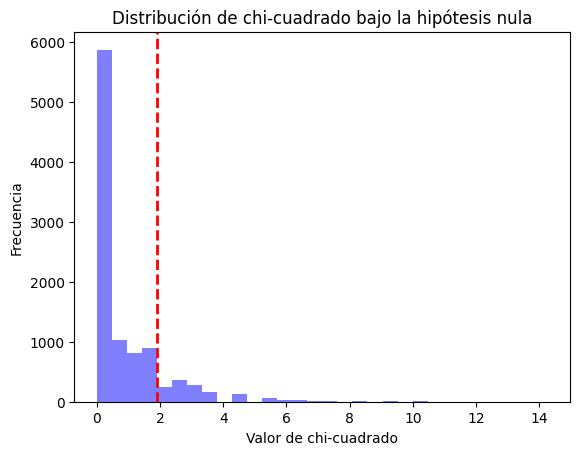

In [21]:
plt.hist(chi2_per, bins=30, color='blue', alpha=0.5)
plt.axvline(chi2_obs, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Valor de chi-cuadrado')
plt.ylabel('Frecuencia')
plt.title('Distribución de chi-cuadrado bajo la hipótesis nula')
plt.show()

# Ejercicio: desarrollar un test estadistico para rechazar o aceptar la hipotesis nula de independencia de variables para Pclass vs survived